# New Section

IMPORT LIBRARIES

In [ ]:
!pip install python-Levenshtein
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math
from scipy.signal import convolve2d
import random

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 60.9 MB/s eta 0:00:00


(58, 115)


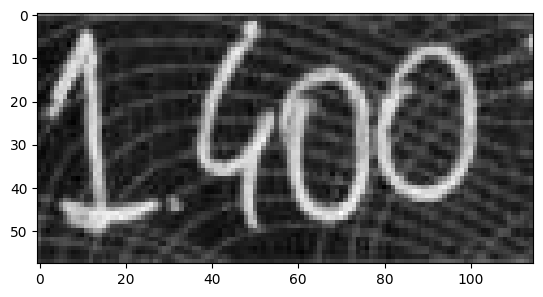

In [ ]:
# Load the image
image = cv2.imread('a_car_002180.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
image = 255 - image
plt.imshow(image,cmap = 'gray')
smooth_image = cv2.GaussianBlur(image,(5,5),0)

CONVERT REQUIRED FOR

In [ ]:
def load_and_convert_to_gray_image(path):
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # print(image.shape)
  image = 255 - image# because my model (in mnist_lenet5 trained )
  return image

def contour_count (img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contours)

MORPHOLOGY PROCESS

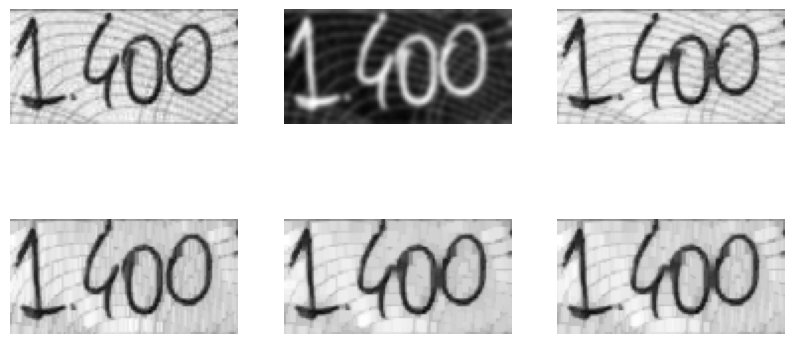

In [ ]:
image = cv2.imread('a_car_002180.png' , cv2.IMREAD_GRAYSCALE)
# Define the structuring elements
horizontal = np.ones((1, 3), np.uint8)
vertical = np.ones((5, 1), np.uint8)

# Perform dilation with both horizontal and vertical structuring elements
opened_h = cv2.morphologyEx(image, cv2.MORPH_OPEN, horizontal)
opened_h_v =cv2.morphologyEx(opened_h, cv2.MORPH_OPEN, vertical)

opened_v = cv2.morphologyEx(image, cv2.MORPH_OPEN, vertical)
opened_v_h = cv2.morphologyEx(opened_v, cv2.MORPH_OPEN, horizontal)


images = [image,smooth_image , opened_h , opened_v,opened_v_h ,opened_h_v ]
# Display the dilated image
plt.subplots(2,3, figsize=(10,5))
for i in range(len(images)):
  plt.subplot(2,3, i+1)
  plt.imshow(images[i], cmap='gray')
  plt.axis('off')

find component with simple thresholding area



print each shape for each image it's area
0:6412.5
0:1381.5
0:263.5
0:349.5
0:363.5
0:309.5
show each image with it's contour count 
1:240.0
1:1464.5
1:319.0
1:403.0
show each image with it's contour count 
2:6402.0
2:367.0
2:1707.5
2:261.5
2:349.5
show each image with it's contour count 
3:5718.5
3:1381.5
3:254.5
3:340.5
show each image with it's contour count 
4:252.5
4:340.5
4:4309.5
show each image with it's contour count 
5:252.5
5:340.5
5:4309.5
show each image with it's contour count 


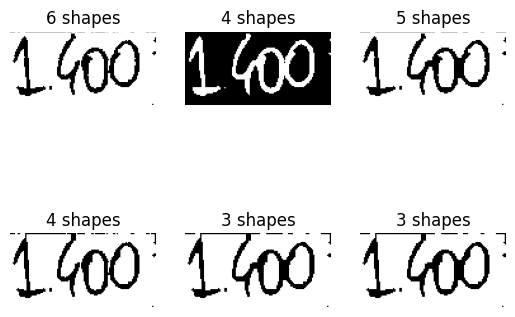

In [ ]:
print(f"print each shape for each image it's area")
for i in range(len(images)):
  new_contours = []
  _, threshold = cv2.threshold(images[i], 127, 255, cv2.THRESH_BINARY)
  contours, _ = cv2.findContours(
      threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  for j in contours:
    if cv2.contourArea(j) > 100:
      new_contours.append(j)
      print(f"{i}:{cv2.contourArea(j)}")
  print(f"show each image with it's contour count ")
  plt.subplot(2,3, i+1)
  plt.imshow(threshold, cmap='gray')
  plt.axis('off')
  plt.title(f"{len(new_contours)} shapes")

FIND COMPONENT WITH OTSU WITH EACH COMPONENT AREA

print each shape for each image it's area
0:6419.5
0:1377.0
0:264.5
0:349.5
0:361.5
0:309.5
show each image with it's contour count 
1:267.0
1:1532.5
1:296.0
1:389.5
show each image with it's contour count 
2:6435.0
2:354.0
2:1687.5
2:263.0
2:354.5
show each image with it's contour count 
3:5807.0
3:643.0
3:265.5
3:717.5
3:356.5
show each image with it's contour count 
4:273.5
4:358.0
4:4801.5
4:341.0
show each image with it's contour count 
5:273.5
5:358.0
5:4794.5
5:343.5
show each image with it's contour count 


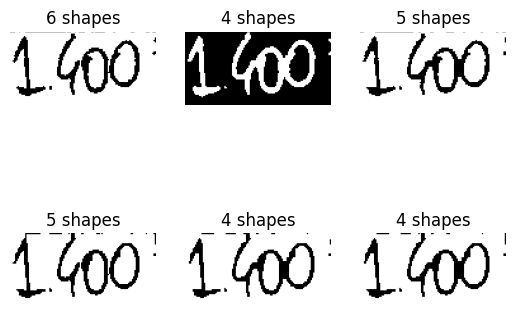

In [ ]:
print(f"print each shape for each image it's area")
for i in range(len(images)):
  new_contours = []
  _,threshold= cv2.threshold(images[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  contours, _ = cv2.findContours(
      threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  for j in contours:
    if cv2.contourArea(j) > 100:
      new_contours.append(j)
      print(f"{i}:{cv2.contourArea(j)}")

  print(f"show each image with it's contour count ")
  plt.subplot(2,3, i+1)
  plt.imshow(threshold, cmap='gray')
  plt.axis('off')
  plt.title(f"{len(new_contours)} shapes")

SHOW PROBLEM OF CONTOUR

(55, 118)


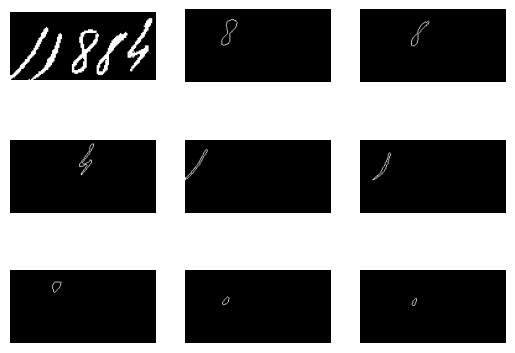

In [ ]:
def find_best_contour(img , numbers_of_contours):
  plt.subplot(3,3, 1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  new_contours = []
  # _, threshold = cv2.threshold(images[i], 127, 255, cv2.THRESH_BINARY)
  _,threshold= cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  plt.imshow(threshold, cmap='gray')
  plt.axis('off')
  contours, _ = cv2.findContours(
      threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  for j in contours:
    # if cv2.contourArea(j) > 100:
    new_contours.append((j,cv2.contourArea(j)))
  sorted_list = sorted(new_contours, key=lambda x: x[1] , reverse=True)#sort base on area value from high to low

  for i in range(numbers_of_contours+2):
    new_img = np.zeros((100,200))
    contour = sorted_list[i][0]
    cv2.drawContours(new_img, [contour], 0, 255, 1)
    cv2.imwrite(f'contour_{i}.png',new_img)
    plt.subplot(3,3, i+2)
    plt.imshow(new_img, cmap='gray')
    plt.axis('off')
    # plt.title(f"{len(new_contours)} shapes")

    # print(f"{i}:{cv2.contourArea(j)}")

image = cv2.imread('/content/a_car_002188.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
image = 255 - image

find_best_contour(image , 6 )

GO WITH CONNECTED COMPONENT FUNCTION

images0 have component with area :299
images0 have component with area :175
images0 have component with area :201
images0 have component with area :336
images0 have component with area :272
images0 have component with area :270
images1 have component with area :277
images1 have component with area :191
images1 have component with area :201
images1 have component with area :189
images2 have component with area :342
images2 have component with area :635
images2 have component with area :153
images2 have component with area :243
images3 have component with area :227
images3 have component with area :168
images3 have component with area :118
images3 have component with area :134
images3 have component with area :135


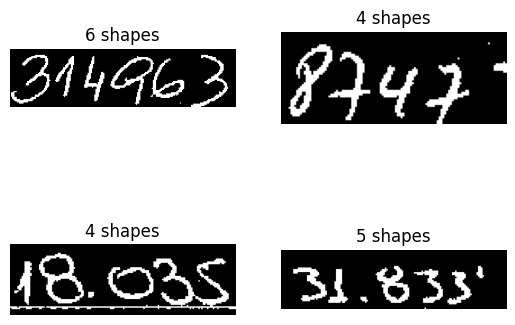

In [ ]:
images = []
images.append(load_and_convert_to_gray_image('/content/a_car_002201.png'))
images.append(load_and_convert_to_gray_image('/content/a_car_002223.png'))
images.append(load_and_convert_to_gray_image('/content/a_car_002229.png'))
images.append(load_and_convert_to_gray_image('/content/a_car_002238.png'))


for i in range(len(images)):
  # _, threshold = cv2.threshold(images[i], 127, 255, cv2.THRESH_BINARY)
  _,threshold= cv2.threshold(images[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  analysis = cv2.connectedComponentsWithStats(threshold,
                                            4,
                                            cv2.CV_32S)
  (totalLabels, label_ids, values, centroid) = analysis
  new_values = []
  for j in range(1 ,len(values)):#we ignore first value because it is background
    area = values[j, cv2.CC_STAT_AREA]
    if area > 100:
      new_values.append(values[j])
      print(f"images{i} have component with area :{area}")
  plt.subplot(2,2, i+1)
  plt.imshow(threshold, cmap='gray')
  plt.axis('off')
  plt.title(f"{len(new_values)} shapes")


# _, threshold = cv2.threshold(images[i], 127, 255, cv2.THRESH_BINARY)
# contours, _ = cv2.findContours(
#     threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# for j in contours:
#   if cv2.contourArea(j) > 100:
#     new_contours.append(j)
#     print(f"{i}:{cv2.contourArea(j)}")
# plt.subplot(2,3, i+1)
# plt.imshow(threshold, cmap='gray')
# plt.axis('off')
# plt.title(f"{len(new_contours)} shapes")

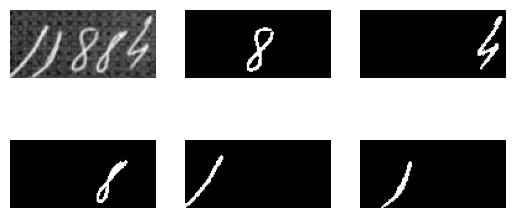

In [ ]:
def find_best_components(img , numbers_of_contours):
  plt.subplot(3,3, 1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')

  # _, threshold = cv2.threshold(images[i], 127, 255, cv2.THRESH_BINARY)
  _,threshold= cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  # plt.imshow(threshold, cmap='gray')
  # plt.axis('off')
  # contours, _ = cv2.findContours(
  #     threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  (totalLabels, label_ids, values, centroid) = cv2.connectedComponentsWithStats(threshold,
                                            4,
                                            cv2.CV_32S)

  # for j in contours:
  #   # if cv2.contourArea(j) > 100:
  #   new_contours.append((j,cv2.contourArea(j)))
  # sorted_list = sorted(new_contours, key=lambda x: x[1] , reverse=True)
  new_values = []
  for j in range(1 ,len(values)):#we ignore first value because it is background
    area = values[j, cv2.CC_STAT_AREA]
    if area > 100:
      new_values.append((area , j ,values[j]))#j mean label id
  sorted_list = sorted(new_values, key=lambda x: x[0] , reverse=True)

  for i in range(numbers_of_contours):
    output = np.zeros(threshold.shape, dtype="uint8")
    id = sorted_list[i][1]
    # cv2.drawContours(new_img, [contour], 0, 255, 1)
    componentMask = (label_ids == id).astype("uint8") * 255
    output = cv2.bitwise_or(output, componentMask)

    # cv2.imwrite(f'component_{i}.png',output)
    plt.subplot(3,3, i+2)
    plt.imshow(output, cmap='gray')
    plt.axis('off')
    # plt.title(f"{len(new_contours)} shapes")

    # print(f"{i}:{cv2.contourArea(j)}")

image =load_and_convert_to_gray_image('/content/a_car_002188.png')
# images = []
# images.append(load_and_convert_to_gray_image('/content/a_car_002201.png'))
# images.append(load_and_convert_to_gray_image('/content/a_car_002223.png'))
# images.append(load_and_convert_to_gray_image('/content/a_car_002229.png'))
# images.append(load_and_convert_to_gray_image('/content/a_car_002238.png'))

find_best_components(image , 5 )

PREPROCESS TEST

DOWNLOAD DATASET

In [ ]:
# !wget https://www.orand.cl/orand_car/ORAND-CAR-2014.tar.gz -O /content/drive/MyDrive/Roshan_project/ORAND-CAR-2014.tar.gz
!wget https://www.orand.cl/orand_car/ORAND-CAR-2014.tar.gz -O /content/ORAND-CAR-2014.tar.gz
# !tar -xf /content/drive/MyDrive/Roshan_project/ORAND-CAR-2014.tar.gz
!tar -xf /content/ORAND-CAR-2014.tar.gz

--2024-08-16 23:27:08--  https://www.orand.cl/orand_car/ORAND-CAR-2014.tar.gz
Resolving www.orand.cl (www.orand.cl)... 162.241.225.60
Connecting to www.orand.cl (www.orand.cl)|162.241.225.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203530245 (194M) [application/x-gzip]
Saving to: ‘/content/ORAND-CAR-2014.tar.gz’

/content/ORAND-CAR- 100%[===================>] 194.10M  24.4MB/s    in 8.9s    

2024-08-16 23:27:37 (21.8 MB/s) - ‘/content/ORAND-CAR-2014.tar.gz’ saved [203530245/203530245]



In [ ]:
def extract_path_and_number(path):
  file_path = path
  # Initialize an empty list to store the tuples
  data_list = []
  # Open the file and read it line by line
  with open(file_path, 'r') as file:
      for line in file:
          # Strip any leading/trailing whitespace characters
          line = line.strip()

          # Split the line into parts (assuming space as delimiter; change if necessary)
          parts = line.split('	')

          # Extract the image file name and the integer value
          image_file = parts[0]
          integer_value = (parts[1])

          # Append the tuple to the list
          data_list.append((image_file, integer_value))

  # Print the resulting list of tuples
  print(f"number of file:{len(data_list)}")
  return data_list
def extract_text_file(path):
    # Define the file path
  file_path = path

  # Initialize an empty list to store the tuples
  data_list = []
  # Open the file and read it line by line
  with open(file_path, 'r') as file:
      for line in file:
          # Strip any leading/trailing whitespace characters
          line = line.strip()

          # Split the line into parts (assuming space as delimiter; change if necessary)
          parts = line.split('	')

          # Extract the image file name and the integer value
          image_file = parts[0]
          integer_value = int(len(parts[1]))

          # Append the tuple to the list
          data_list.append((image_file, integer_value))

  # Print the resulting list of tuples
  print(f"number of file:{len(data_list)}")
  return data_list

# data_list_a = extract_text_file('/content/drive/MyDrive/Roshan_project/ORAND-CAR-2014/CAR-A/a_train_gt.txt')
# data_list_b = extract_text_file('/content/drive/MyDrive/Roshan_project/ORAND-CAR-2014/CAR-B/b_train_gt.txt')
data_list_a = extract_text_file('/content/ORAND-CAR-2014/CAR-A/a_train_gt.txt')
data_list_b = extract_text_file('/content/ORAND-CAR-2014/CAR-B/b_train_gt.txt')

# image_path_and_its_number_a = extract_path_and_number('/content/drive/MyDrive/Roshan_project/ORAND-CAR-2014/CAR-A/a_train_gt.txt')
# image_path_and_its_number_b = extract_path_and_number('/content/drive/MyDrive/Roshan_project/ORAND-CAR-2014/CAR-B/b_train_gt.txt')
image_path_and_its_number_a = extract_path_and_number('/content/ORAND-CAR-2014/CAR-A/a_train_gt.txt')
image_path_and_its_number_b = extract_path_and_number('/content/ORAND-CAR-2014/CAR-B/b_train_gt.txt')

number of file:2009
number of file:3000
number of file:2009
number of file:3000


remove alternative noise with fourier transform

In [ ]:
def fill_black_out_of_circle(image):
  '''
  create specific circle
  with bitwise_and all pixel within circle remain but out of circle get zero value
  '''
  # Create a mask
  mask = np.zeros(image.shape[:2], dtype="uint8")

  # Draw a circle on the mask
  # cv2.circle(mask, (645, 407), 100, 255, -1)
  cv2.circle(mask, (mask.shape[1]//2,mask.shape[0]//2), 35, 255, -1)

  # Apply the mask to the image
  masked_image = cv2.bitwise_and(image, image, mask=mask)
  return masked_image

def delete_noise_with_fourier(img):
  '''
  transform to frequency space
  shift for better visualization and noise deletion
  just keep center(circle with specific radius)
  reconstruc image with phase and magnitude
  '''
  # Convert image to float32 for better precision
  img_float32 = np.float32(img)

  # Compute 2D FFT
  dft = np.fft.fft2(img_float32)

  # Shift zero-frequency to center
  dft_shifted = np.fft.fftshift(dft)

  # Calculate magnitude (amplitude)
  old_magnitude_spectrum = np.abs(dft_shifted)

  new_magnitude_spectrum = fill_black_out_of_circle(old_magnitude_spectrum)


  # Calculate phase spectrum (arctan of real and imaginary components)
  phase_spectrum = np.angle(dft_shifted)

  # Reconstruct DFT from magnitude and phase (assuming real-valued image)
  reconstructed_dft = new_magnitude_spectrum * np.exp(1j * phase_spectrum)

  # Perform inverse FFT to reconstruct image
  dft_inverse = np.fft.ifft2(reconstructed_dft)

  # Shift zero-frequency back to top-left corner (optional)
  # reconstructed_image = np.abs(np.fft.ifftshift(dft_inverse))
  reconstructed_image = np.abs((dft_inverse))
  return reconstructed_image

remove noise like underline in some image(remove_line) or line in right side of some image (remove_right_side_line)

In [ ]:
def remove_line(threshold , hough_thr , min_len_thresh , y_diff,x_diff):
  ret_is_line = False
  y,x = threshold.shape
  for loop in range(3):
    thickness = 4
    is_line = False
    lines = cv2.HoughLinesP(threshold, rho=1, theta=np.pi/180, threshold=hough_thr, minLineLength=x - (min_len_thresh*x), maxLineGap=3)#some test need on affect of threshold
    if lines is not None:
      for line in lines:
        x1, y1, x2, y2 = line[0]  # Extract line endpoints
        # some criteria
        if abs(y2 - y1) < y_diff:#this two criteria for checking the angle of line
          if abs(x2-x1) > x_diff:
            is_line = True
        if is_line:
            # print('yes')
            thickness+=1#every vote mean have thicker line then must affect on this
    if is_line:
      ret_is_line = True
      # output = np.zeros((threshold.shape[0],threshold.shape[1],3), dtype="uint8")
      cv2.line(threshold, (x1, y1), (x2, y2), (0, 0, 0), thickness)  # Draw black line with thicker than white line to remove it from original image
    if is_line:
      continue
    else:
      break
  return threshold , ret_is_line
def remove_right_side_line(threshold ,hough_thr,min_len_thresh, y_diff,x_diff ):
  height, width = threshold.shape

  # Split the threshold into left and right halves
  left_side = threshold[:, :(55*width) //100 ]
  right_side = threshold[:, (55*width) // 100:]
  right_side , isline = remove_line(right_side , hough_thr , min_len_thresh , y_diff , x_diff)
  threshold = np.hstack((left_side, right_side))
  return threshold , isline


def preprocess(gray_img):
  #we can uncomment each line to apply that preprocess

  # remove alternate noise with fourier transform
  # denoise_img = delete_noise_with_fourier(gray_img)
  # gray_img = denoise_img.astype(np.uint8)

  #binarize image
  # _,threshold= cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)
  _,threshold= cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  # threshold = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
  #                                           cv2.THRESH_BINARY, 21, 5)

  #remove line under number with houghlineP
  # threshold , isline = remove_line(threshold = threshold ,hough_thr= 100 ,min_len_thresh= 0.2 ,y_diff=20 , x_diff = 0)
  # threshold , isline2 = remove_right_side_line(threshold = threshold ,hough_thr= 30 ,min_len_thresh= 0.2 ,y_diff= 60 , x_diff = 40)
  isline = False
  # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  # threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)
  # threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, np.ones((2, 1), np.uint8))
  # threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, np.ones((1, 3), np.uint8))


  (totalLabels, label_ids, values, centroid) = cv2.connectedComponentsWithStats(threshold,
                                            4,
                                            cv2.CV_32S)

  new_values = []
  for j in range(1 ,len(values)):#we ignore first value because it is background
    area = values[j, cv2.CC_STAT_AREA]
    if area > 95:
      new_values.append((area , j ,values[j]))#j mean label id
  # return totalLabels,threshold
  return len(new_values),threshold,isline


problems_a = []
problems_b = []
img_with_line = []
for image_info in data_list_a:
  image = load_and_convert_to_gray_image(f'/content/ORAND-CAR-2014/CAR-A/a_train_images/{image_info[0]}')
  character_count , th ,isline=preprocess(image.copy())

  if isline:
    img_with_line.append((th ,image_info[0],character_count,image_info[1] ))

  if character_count != image_info[1]:
    problems_a.append((image_info[0],character_count,image_info[1]))


for image_info in data_list_b:
  image = load_and_convert_to_gray_image(f'/content/ORAND-CAR-2014/CAR-B/b_train_images/{image_info[0]}')
  character_count , th ,isline=preprocess(image)

  if isline:
    img_with_line.append((th ,image_info[0],character_count,image_info[1] ))

  if character_count != image_info[1]:
    problems_b.append((image_info[0],character_count,image_info[1]))

print(f"image with right side line count is:{len(img_with_line)}")
print(f"number of image a:{len(data_list_a)}\nnumber of problem a:{len(problems_a)}")
print(f"number of image b:{len(data_list_b)}\nproblem b:{len(problems_b)}")

image with right side line count is:0
number of image a:2009
number of problem a:1319
number of image b:3000
problem b:2605


SHOW SOME RANDOM IMAGE TO GUESS ANOTHER APPROACH

In [ ]:
for j in range(0,7):
  i = random.randint(0,len(img_with_line)-1)
  # i = j
  print(f"correct answer for image:{img_with_line[i][1]} is :{img_with_line[i][3]} but get:{img_with_line[i][2]}")
  plt.figure(figsize=(20, 15))
  plt.subplot(4,10,j+1)
  plt.imshow(img_with_line[i][0], cmap='gray')
  plt.axis('off')
  plt.show()

correct length answer for image:a_car_001456.png is :4 but get:3


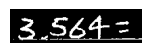

correct length answer for image:a_car_000900.png is :5 but get:3


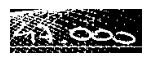

correct length answer for image:a_car_001341.png is :4 but get:3


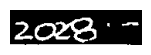

correct length answer for image:a_car_000590.png is :4 but get:1


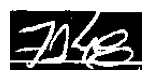

correct length answer for image:a_car_001054.png is :6 but get:5


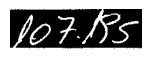

correct length answer for image:a_car_000185.png is :3 but get:2


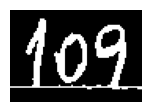

correct length answer for image:a_car_000583.png is :5 but get:6


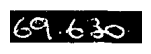

In [ ]:
for j in range(7):
  i = random.randint(0,len(problems_a)-1)
  print(f"correct length answer for image:{problems_a[i][0]} is :{problems_a[i][2]} but get:{problems_a[i][1]}")
  gray=load_and_convert_to_gray_image(f'/content/ORAND-CAR-2014/CAR-A/a_train_images/{problems_a[i][0]}')
  # gray=load_and_convert_to_gray_image(f'/content/ORAND-CAR-2014/CAR-B/b_train_images/{problems_a[i][0]}')
  _,thresh,_ = preprocess(gray)
  plt.figure(figsize=(20, 15))
  plt.subplot(4,10,j+1)
  plt.imshow(thresh, cmap='gray')
  plt.axis('off')
  plt.show()

PREDICTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp /content/drive/MyDrive/Roshan_project/Mnist_model/model_checkpoint.keras .
!cp /content/drive/MyDrive/model_checkpoint.keras .

In [ ]:
# for load model
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/model_checkpoint.keras')

In [ ]:
def convert_list_to_number(numbers):
  return (''.join(map(str, numbers)))
def extract_each_character(image):
  error = False
  result =0
  (totalLabels, label_ids, values, centroid) = cv2.connectedComponentsWithStats(image,
                                            4,
                                            cv2.CV_32S)
  new_values = []
  for j in range(1 ,len(values)):#we ignore first value because it is background
    area = values[j, cv2.CC_STAT_AREA]
    if area > 95:
      new_values.append((j ,values[j]))#j mean label id
  new_values = sorted(new_values, key=lambda x: x[1][0])
  # count = len(new_values)
  numbers=[]
  for i in range(len(new_values)):
    # x, y, w, h, area = new_values[i][1]

    output = np.zeros((50,40), dtype="uint8")
    y_center = output.shape[0]//2
    x_center = output.shape[1]//2

    id = new_values[i][0]

    componentMask = (label_ids == id).astype("uint8") * 255
    #
    x, y, w, h = cv2.boundingRect(componentMask)
    componentMask = cv2.resize(componentMask[y:y+h, x:x+w] , (28,28))
    output[y_center-(14):y_center+14 , x_center -14:x_center+14]=componentMask
    # output = cv2.resize(componentMask[y:y+h, x:x+w] , (28,28))

    # try:
    #   output[h_h-(h//2)-h_diff:h_h+(h//2) , w_h -(w//2)-w_diff:w_h+(w//2)]=componentMask[y:y+h, x:x+w]
    # except:
    #   error = True
    #   print(f'get error')

    # If you want to preserve the original image content:
    # new_output[offset_y:offset_y+h, offset_x:offset_x+w] = image[y:y+h, x:x+w]

    # plt.subplot(2,4,i+1)
    # plt.imshow(output, cmap='gray')
    # plt.axis('off')


    # cv2.imwrite(f'component_{i}.png',output)


    # print(f"{i}:{cv2.contourArea(j)}"
    numbers.append( predict_my_input(output))
  return (''.join(map(str, numbers))) , error
  # return numbers


def predict_my_input(image):


  image = cv2.resize(image, (28, 28))#*********************************************
  # image = cv2.resize(image, (28,28), interpolation=cv2.INTER_CUBIC) no positive affect

  # plt.subplot(1,2,2)
  # plt.imshow(image, cmap='gray')
  # plt.axis('off')

  image = np.expand_dims(image, axis=2)
  image = np.expand_dims(image, axis=0)
  # image = 255 - image
  # plt.imshow(image[0, ..., 0], cmap='gray')

  image = image.astype(float) / 255
  p = loaded_model.predict(image, verbose=0)
  # print(p)
  p=np.argmax(p)
  # print(p)
  return p
  # return (image,p)
  # plt.imshow(image[0, ..., 0], cmap='gray')


In [ ]:
img = cv2.imread("01.png" , cv2.IMREAD_GRAYSCALE)
print(predict_my_input(img))

5


In [ ]:
# predict_my_input('/content/3_object.png')
# image_path_and_its_number_a
# image_path_and_its_number_b
correct_preprocess = []
for image_info in image_path_and_its_number_a:
  image = load_and_convert_to_gray_image(f'/content/ORAND-CAR-2014/CAR-A/a_train_images/{image_info[0]}')
  character_count , th ,isline=preprocess(image.copy())

  if character_count == len(image_info[1]):
    # correct_preprocess.append((image_info[0],character_count,image_info[1]))
    correct_preprocess.append((image_info[0],th,image_info[1]))


for image_info in image_path_and_its_number_b:
  image = load_and_convert_to_gray_image(f'/content/ORAND-CAR-2014/CAR-B/b_train_images/{image_info[0]}')
  character_count , th ,isline=preprocess(image)

  if character_count == len(image_info[1]):
    correct_preprocess.append((image_info[0],th,image_info[1]))

    # print(f"correct answer for image:{correct_process[0]} is :{correct_process[2]} but get:{result}")
# print(f"number of image a:{len(data_list_a)}\nnumber of problem a:{len(problems_a)}")
# print(f"number of image b:{len(data_list_b)}\nproblem b:{len(problems_b)}")

In [ ]:
# image_info = image_path_and_its_number_a[0]
# image = load_and_convert_to_gray_image(f'/content/ORAND-CAR-2014/CAR-A/a_train_images/{image_info[0]}')
# character_count , th ,isline=preprocess(image.copy())
# plt.imshow(th, cmap='gray')
total_char = 0
total_levenshtien_distance = 0
list_of_errors = []
errors = 0
print(len(correct_preprocess))
# x = 10
for i in correct_preprocess:
  # if x < 0:
  #   break
  # x -= 1
# i = correct_preprocess[0]
  (totalLabels, label_ids, values, centroid) = cv2.connectedComponentsWithStats(i[1],
                                          4,
                                          cv2.CV_32S)
  # plt.imshow(i[1], cmap='gray')
  # plt.show()
  result,is_error = extract_each_character(i[1])
  if is_error:
    print(f"image from {i[0]} which must be {i[2]} and predict {result} get error")
  # print(f"result:{result}\nmust be:{i[2]}")
  if result != i[2]:
    list_of_errors.append((i[1] ,i[0],result,i[2]))
    errors += 1


    total_char += len(i[2])
    total_levenshtien_distance += Levenshtein.distance(result ,i[2])



print(f"total image : {len(correct_preprocess)}\nnumber of errors:{errors}")
print(f"accuracy:{len(correct_preprocess) - errors}/{5009} = {(len(correct_preprocess) - errors)/5009}")
print(f"levenshtien distance:{total_levenshtien_distance} , total_char:{total_char}\naverage levenshtien distance:{total_levenshtien_distance/total_char}")

1085
total image : 1085
number of errors:835
accuracy:250/5009 = 0.049910161708923935
levenshtien distance:1711 , total_char:4111
average levenshtien distance:0.4162004378496716


In [ ]:
image_path_and_its_number_a_copy = image_path_and_its_number_a.copy()
image_path_and_its_number_b_copy = image_path_and_its_number_b.copy()
for i in image_path_and_its_number_a_copy:
  temp = ('/content/ORAND-CAR-2014/CAR-A/a_train_images/' + i[0] , i[1])
  image_path_and_its_number_a_copy[image_path_and_its_number_a_copy.index(i)] = temp
for i in image_path_and_its_number_b_copy:
  temp = ('/content/ORAND-CAR-2014/CAR-B/b_train_images/' + i[0] , i[1])
  image_path_and_its_number_b_copy[image_path_and_its_number_b_copy.index(i)] = temp

image_path_and_its_number_all = image_path_and_its_number_a_copy + image_path_and_its_number_b_copy

In [ ]:
total_char = 0
total_levenshtien_distance = 0
list_of_errors = []
errors = 0


for image_info in image_path_and_its_number_all:
  image = load_and_convert_to_gray_image(image_info[0])
  character_count , th ,isline=preprocess(image.copy())

  (totalLabels, label_ids, values, centroid) = cv2.connectedComponentsWithStats(th,
                                          4,
                                          cv2.CV_32S)

# correct_preprocess.append((image_info[0],th,image_info[1]))

  result,is_error = extract_each_character(th)
  if is_error:
    print(f"image from {image_info[0]} which must be {image_info[1]} and predict {result} get error")
  # print(f"result:{result}\nmust be:{i[2]}")
  if result != image_info[1]:
    list_of_errors.append((th ,image_info[0],result,image_info[1]))
    errors += 1


    total_char += len(image_info[1])
    total_levenshtien_distance += Levenshtein.distance(result ,image_info[1])





In [ ]:
print(f"total image : {len(image_path_and_its_number_all)}\nnumber of errors:{errors}")
print(f"accuracy:{len(image_path_and_its_number_all) - errors}/{5009} = {(len(image_path_and_its_number_all) - errors)/5009}")
print(f"levenshtien distance:{total_levenshtien_distance} , total_char:{total_char}\naverage levenshtien distance:{total_levenshtien_distance/total_char}")

total image : 5009
number of errors:4759
accuracy:250/5009 = 0.049910161708923935
levenshtien distance:15560 , total_char:24750
average levenshtien distance:0.6286868686868687
